In [1]:
Machine Learning's Mathematical Pillars

- Statistics
- Linear Algebra
- Calculus
- Probability

SyntaxError: invalid syntax (<ipython-input-1-f8c09cba1444>, line 1)

In [2]:
                                Machine Learning
    Supervised                      Unsupervised                  Reinforcement
    Learning                         Learning                     Learning
Regression    Classification   Clustring  Dimension  Anomaly          Markov
                                          reduction  Detection        Decision
                                                                      Process
- Linear Regression                - k-means clustering
- Logistic Regression              - PCA(Principal Component
- k-nearest neighbour                        Analysis)
- Support Vector Machines(SVM)     - Autoencoders
- Decision Trees
- Random Forest
- AdaBoost
- Neural Network(Deep Learning)
    - CNN
    - RNN

SyntaxError: invalid syntax (<ipython-input-2-ff39b4b2a169>, line 1)

https://www.google.com/search?q=maze+game&sxsrf=APq-WBtRrE3tY99lwk0Xsp_29meJvGZNvA:1649306471498&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiezu-ykYH3AhW8xDgGHcRLDa8Q_AUoAXoECAEQAw&biw=1600&bih=757#imgrc=1kxJXc_paBQ57M




Artificial Intelligence: A Modern Approach




https://www.google.com/search?q=clustering&sxsrf=APq-WBuB-xqWzzoNto0WojkAvXDLE8ywBA:1649307793182&source=lnms&tbm=isch&sa=X&ved=2ahUKEwih9IyploH3AhWySGwGHSzIBS4Q_AUoAXoECAIQAw&biw=1600&bih=757#imgrc=BOphoLQ0t9BnrM



https://this-person-does-not-exist.com/en





# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [6]:
!python --version

Python 3.7.6


# Load the Data

In [8]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Analysis ( Exploratory Data Analysis ) EDA

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing Values

In [10]:
sns.heatmap?

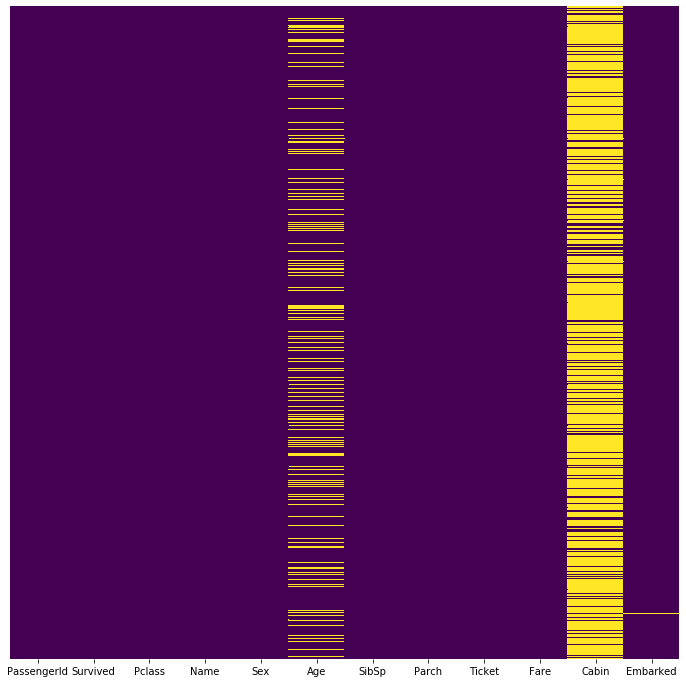

In [11]:
plt.figure(figsize=(12,12))

sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

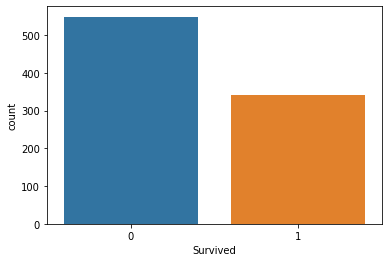

In [12]:
sns.countplot(x='Survived', data=titanic)

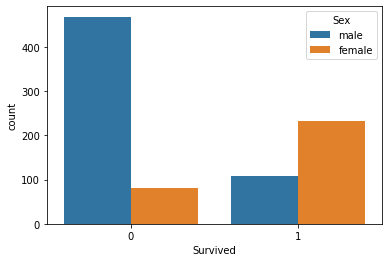

In [13]:
sns.countplot(x='Survived', hue='Sex' ,data=titanic)

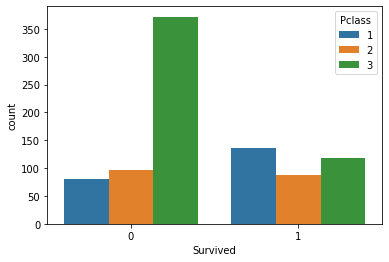

In [14]:
sns.countplot(x='Survived', hue='Pclass' ,data=titanic)

In [15]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
sns.distplot?

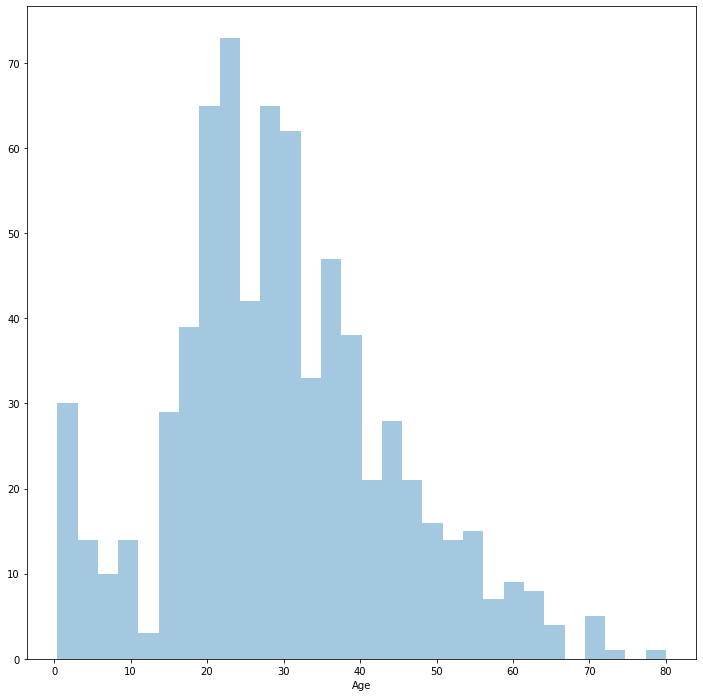

In [17]:
plt.figure(figsize=(12,12))

sns.distplot(titanic['Age'].dropna(), kde=False, bins=30 )

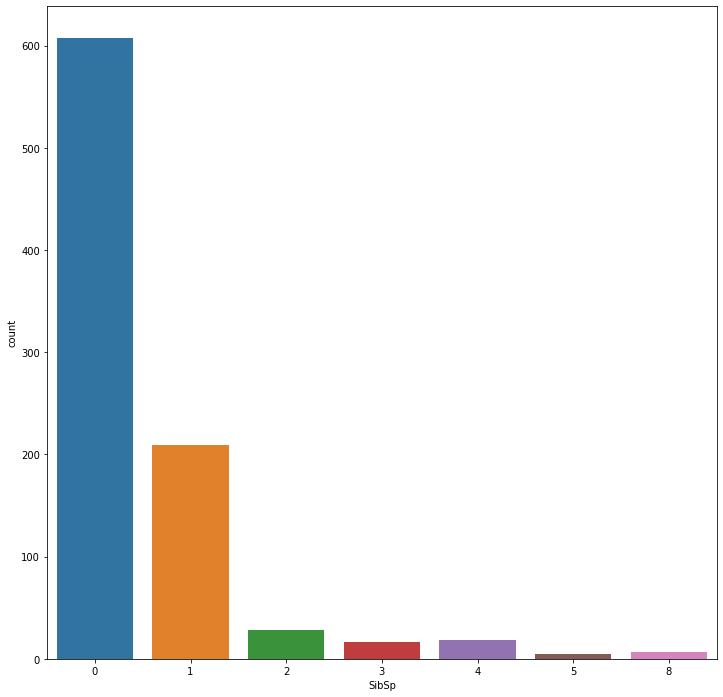

In [18]:
plt.figure(figsize=(12,12))
sns.countplot(x='SibSp', data=titanic)

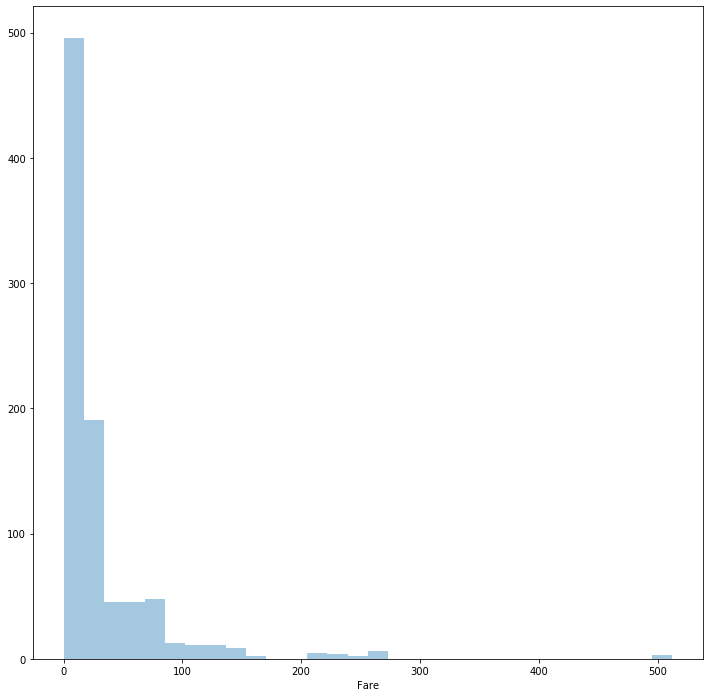

In [19]:
plt.figure(figsize=(12,12))

sns.distplot(titanic['Fare'].dropna(), kde=False, bins=30)

In [20]:
titanic.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [21]:
def age_distribution(cols):
    age_map = [38, 30, 25]
    age , pclass = cols[0] , cols[1]
    
    if pd.isnull(age):
        return age_map[int(pclass-1)]
    else:
        return age

In [22]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age_distribution, axis = 1)

In [23]:
titanic.drop('Cabin', axis=1 ,inplace=True)
titanic.dropna(inplace=True)

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


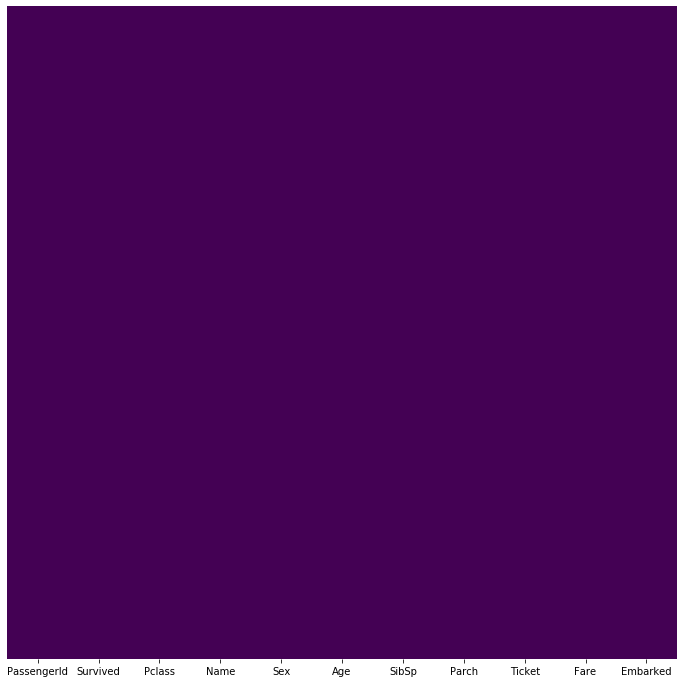

In [25]:
plt.figure(figsize=(12,12))

sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Feature Engineering

In [27]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
embarked = pd.get_dummies(titanic['Embarked'])
embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [29]:
sibsp = pd.get_dummies(titanic['SibSp'], prefix='SibSp')
sibsp.head()

,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [30]:
parch = pd.get_dummies(titanic['Parch'], prefix='Parch')
parch.head()

,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
titanic = titanic.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket', 'SibSp', 'Parch' ], axis=1)

titanic = pd.concat([titanic, sex,embarked, sibsp, parch], axis=1)
titanic.head()

,Survived,Pclass,Age,Fare,male,C,Q,S,SibSp_0,SibSp_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,3,22.0,7.2500,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,1,38.0,71.2833,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,35.0,53.1000,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,3,35.0,8.0500,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


# Create Model

In [33]:
X = titanic.drop('Survived', axis=1)

y = titanic['Survived']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
X_train.shape

(622, 21)

In [36]:
y_train.shape

(622,)

In [37]:
X_test.shape

(267, 21)

In [38]:
y_test.shape

(267,)

In [39]:
model = LogisticRegression()

In [41]:
model.fit(X_train, y_train)

/home/heman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
predictions = model.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

In [45]:
model.predict_proba(X_test)

array([[0.90465418, 0.09534582],
       [0.03521511, 0.96478489],
       [0.19813387, 0.80186613],
       [0.79028366, 0.20971634],
       [0.04596052, 0.95403948],
       [0.90118426, 0.09881574],
       [0.75351099, 0.24648901],
       [0.87599924, 0.12400076],
       [0.03718192, 0.96281808],
       [0.04957392, 0.95042608],
       [0.66985771, 0.33014229],
       [0.37373899, 0.62626101],
       [0.96137472, 0.03862528],
       [0.84124383, 0.15875617],
       [0.90785409, 0.09214591],
       [0.90136238, 0.09863762],
       [0.61022816, 0.38977184],
       [0.83901824, 0.16098176],
       [0.54141734, 0.45858266],
       [0.89325314, 0.10674686],
       [0.6339198 , 0.3660802 ],
       [0.06472033, 0.93527967],
       [0.89802128, 0.10197872],
       [0.53856665, 0.46143335],
       [0.89321546, 0.10678454],
       [0.55928421, 0.44071579],
       [0.75079034, 0.24920966],
       [0.18329461, 0.81670539],
       [0.64385619, 0.35614381],
       [0.76236206, 0.23763794],
       [0.

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       167
           1       0.78      0.74      0.76       100

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



In [47]:
accuracy_score(y_test, predictions)

0.8239700374531835